In [1]:
%%javascript
$.getScript('ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<div style="float: left; margin-right: 20px;font-size:20px" ><b> Presentation of the results </b></div> <div style="float: right; margin-right: 20px;font-size:20px" ><b> Février 2020 </b></div>
&nbsp;
<hr> </hr>

<div style="text-align: center;font-size:30px;font-weight:bold"> Reinforcement learning : improving learning rate </div>
<hr> </hr>



<div style="float: left; margin-right: 20px;font-size:27px;font-weight:bold" id="tocheading">Table of Contents</div>
<div style="height:30px" id="spacebeforetoc"> </div>
<div style="font-size:20px;font-weight:bold" id="toc"></div>

<div style="float: left; margin-right: 20px;font-size:27px;font-weight:bold" id="tocheading">Import libraries </div>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Plotting.plotting as pltg


### For part 1 
from Estim_mean.Compare_methods import Compare_methods, plot_estim_quick

### For part 2
from Opti_placement.Compare_method_opti_placement import Compare_methods_op

### For part 3 
from Opti_exec.Compare_methods_optiexec import Compare_methods_opexec

# Part 1: Drift estimation

**Context:** We observe a process $(S_{n})_{n\geq 0}$ which satisfies 
    
$$
S_{n+1} = S_n + f_{n+1} + W_n,
$$

with $W_n$ a centered noise with finite variance. 

__We want to estimate the quantities $f_i$ with $i \in  \{1,\cdots,n_{max} \}$.__

Using $\mathbb{E}[W_t] = 0$, we get 

$$
\mathbb{E}\big[S_{i+1} - S_{i} - f_{i+1} \big] = 0, \qquad \forall i \in \{0,\cdots,n_{max}-1 \}.
$$

Thus, we can estimate using the following algorithm to approximate $(f_i)_{1 \leq i \leq n_{max}}$

$$
\left\{
\begin{array}{lcl}
f^{n+1}_{j+1} & = & f^n_{j+1} - \gamma^n_j \big(S^{n+1}_{j+1} - S^{n}_j - f^{n}_{j+1}\big), \qquad \forall j \in \{0,\cdots,n_{max}-1 \}. \\
f^{0}_{j} & = & f_0 \text{ is given.}
\end{array}
\right.
$$


## Presentation of the algorithms

For this we compare 4 types of algorithm:

1. **1/n**: In this case the learning rate $(\gamma_n)_{n \geq 1}$ is taken such that 
$$
\gamma^n_j = \cfrac{\eta}{nb_j}, \qquad \eta > 0,
$$
with $nb_j$ the number of visits of the state $j$. Note that we modify the learning rate $\gamma^n_j$ only when the state $j$ is visited. 
2. **step_cste**: In this case the learning rate $(\gamma_n)_{n \geq 1}$ is piece-wise constant. We start with an inital value $\gamma_0$ for the learning rate and when the average error 

$$
\big(S^{n+1}_{j+1} - S^{n}_j - f^{n}_{j+1}\big),
$$

   over the last $p$ visit times starts to stabilize, we reduce the value of the learning rate by a factor $\alpha$.
   
3. **SAGA**: In this case the learning rate $(\gamma_n)_{n \geq 1}$ follows the **step_cste** policy and we apply the following version of the SAGA algorithm:
$$
\begin{array}{lcl}
f^{n+1}(j+1) & = & f^{n}(j+1) - \gamma^n_j \left[m(f^n,\Delta S^{n+1},j) - \color{blue}M^n[j,\color{green}i] +  \cfrac{\big(\sum_{r=1}^M  \color{blue}M^n[j,r] \big)}{M }\right] ,\\
m(f^n,\Delta S^{n+1},j)  & = & \big(S^{n+1}_{j+1} - S^{n}_j - f^{n}_{j+1}\big),\\
M^{n+1}[j,i]  & = & m(f^n,\Delta S^{n+1}, j),
\end{array}
$$

   with $f^0$ given, $M^0 = 0$ and $i$ picked from the distribution $p =  (\sum_{i=1}^M \delta_i)/M$. 

4. **PASS**: In this case, we have a piecewise constant ``reference learning rate`` $\gamma_n(z)$ derive from  **step_cste** policy and a ``current learning rate`` $\hat{\gamma}_n(z)$

      1. We use a function $h$ to increase $\hat{\gamma}_n(z)$ when two consecutive descents are in the same direction.
      
      2. We use a function $l$ to decrease $\hat{\gamma}_n(z)$ when it is not the case.
         
   It reads, 
   
   * If $m(q_n,X_{n+1}(Z_n),Z_n) \times m(q_{r^n_1},X_{r^n_1+1}(Z_{r^n_1}),Z_{r^n_1}) \geq 0$, then do 
   $$
   \begin{array}{lcl}
    f^{n+1}_{j+1} & = & f^{n}_{j+1} - h\big(\hat{\gamma}^n_j,\gamma^n_j\big) m(f^n,\Delta S^{n+1},j),\\
\hat{\gamma}^{n+1}_j & = & h\big(\hat{\gamma}^n_j,\gamma^n_j \big), 
   \end{array}
   $$
   with $r^n_j$ is the index of the last $j$-th observation when the process $X$ visits the state $X_n$.
   * Else, do
   $$
   \begin{array}{lcl}
    f^{n+1}_{j+1} & = & f^{n}_{j+1} - l\big(\hat{\gamma}^n_j,\gamma^n_j\big) m(f^n,\Delta S^{n+1},j),\\
\hat{\gamma}^{n+1}_j & = & h\big(\hat{\gamma}^n_j,\gamma^n_j \big).
   \end{array}
   $$

## Implementation of the methods

 n is :0
 n is :50


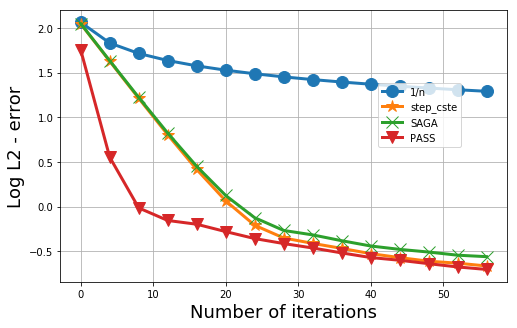

In [15]:
## Plot improvement 
######### Initialize the parameters 
gamma = 0.1 ## learning rate
NbSimu = 100
nb_episode = 70

res = Compare_methods(gamma, NbSimu = NbSimu, nb_episode = nb_episode)
index = res['index']
error1 = res['1/n']
error2 = res['step_cste']
error3 = res['SAGA']
error4 = res['PASS']

option_save = ""
path_Image = "Image"; ImageName = "\\improvement_drift_estim_v2_" + str(NbSimu) + "_simu_f_l_2"
df = [ [index,error1],
       [index,error2],
       [index,error3],
       [index,error4]]

labels = ["1/n", "step_cste", "SAGA", "PASS"]
mark = ['o', '*' , 'x', 'v']
bbox_to_anchor_0 = (0.7,.75)
fig = plt.figure(figsize=(8,5))
pltg.Plot_plot(df,labels, xlabel ="Number of iterations", ylabel ="Log L2 - error",
               option=option_save, path =path_Image, ImageName=ImageName, Nset_tick_x = False, mark = mark, bbox_to_anchor_0 = bbox_to_anchor_0)


In [10]:
from ipywidgets import interactive_output, FloatSlider, VBox, Dropdown, Layout, Label

n = FloatSlider(value=0.1,
              min=0.01,
              max=0.1,
              description="Learning rate",
              continuous_update=False,
              step=0.001,
              layout=Layout(width='auto', height='auto'))


interactive_plot = interactive_output(lambda n : plot_estim_quick(n),
                                      {'n': n})

VBox([interactive_plot, n])

# Part 2: Optimal placement of a limit order

**Context** We consider an agent who aims at buying a unit quantity using limit orders and market orders.

<center>
<img src="./figures/opti_placement.png" style="width: 600px;"/>
    <i> A unit order inserted in the limit order book </i>
</center>


In such case, the agents wonder how to find the right balance between fast execution and avoiding trading costs associated to the bid-ask spread.

The agent state at time $t$ is modelled by $X_t = (Q^{Before},Q^{After},P)$ with $Q^{Before}$ the number of shares placed before the agent's order, $Q^{After}$ the queue size after the agent's order and $P_t$ the mid price. 

The agents wants to minimise the quantity 

$$
\mathbb{E}[F(X_{\tau\vee T^{\textrm{exec}}}) + \int_0^{\tau\vee T^{\textrm{exec}}} c \, ds]
$$

where 

* $T^{\textrm{exec}} = \inf\{ t \geq 0, \, P_t = 0\}$ the first time when the limit order gets a transaction.


* $\tau$ the first time when a market order is sent.


* $X=(Q^{Before},Q^{After}, P)$ the state of the order book.


* $F(u)$ is the price of the transaction (i.e. $F(u)=p+\psi$ when the agents crosses the spread and $F(u)=p$ otherwise).

The $Q$-function 

$$
Q(x,a) = \sup_{A } \mathbb{E}[F(X_{\tau\vee T^{\textrm{exec}}}) + \int_t^{\tau\vee T^{\textrm{exec}}} c \, ds |X_t =x,A_t = a],\quad \forall (x,a)\in  \mathcal{U} \times \mathcal{A},
$$

with $A = \{A_t \, , t < T\}$ a possible control process for the agent. We view the agent control $A$ as a feedback process (i.e adapted to the filtration $\mathcal{F}_t$). 


The $Q$-function satisfies the classical dynamic programming principle (DPP) 

$$
Q(u,a) =   \mathbb{E} [ R_{\Delta} + \underset{a' \in \mathcal{A}}{\sup} \, Q(X_{t+\Delta},a')|X_t = x, A_t = a], 
$$


with $ R_{\Delta} = \int_{t}^{t + \Delta} c\, ds$.  Above equation reads that the optimal expected gain when the agent starts at $x$ and chooses action $a$ at time $t$ is the sum of the next expected reward $R_{\Delta}$ plus the value of acting optimally starting from the new position $X_{t+\Delta}$ at time $t+\Delta$. 

Thus, we can estimate using the following algorithm to approximate $Q$

$$
\left\{
\begin{array}{lcl}
Q^{n+1}_{X_n,A_n} & = & Q^n_{X_n,A_n} - \gamma^n_j \big( R^{n+1} + \underset{a' \in \mathcal{A}}{\sup} \, Q(X_{n+1},a') - Q^n_{X_n,A_n} \big), \\
Q^{0}_{x,a} & = & q_0 \text{ is given,}\quad \forall (x,a)\in \times \mathcal{X} \times \mathcal{A}
\end{array}
\right.
$$



## Presentation of the algorithms

We use the same algorithms used in Part 1 to solve this problem.

## Implementation of the methods

### Load data

In [19]:
path = "Opti_placement\\Data\\"
filename = "Intens_val_qr.csv"
Intens_val = pd.read_csv(path + filename, index_col = 0)
Intens_val_bis = Intens_val[Intens_val['Spread'] == 1].groupby(['BB size']).agg({'Limit':'mean', 'Cancel': 'mean', 'Market': 'mean'}).loc[:10,:]
Intens_val_bis.reset_index(inplace = True)
Intens_val_bis.loc[0,['Cancel','Market']] = 0
    
######### Show the database
print(Intens_val_bis.head(10))

   BB size     Limit    Cancel    Market
0        1  0.235897  0.000000  0.000000
1        2  0.636923  0.259423  0.170782
2        3  0.504821  0.282179  0.126423
3        4  0.471795  0.291282  0.098477
4        5  0.377436  0.300385  0.084282
5        6  0.353846  0.318590  0.077628
6        7  0.349128  0.336795  0.070974
7        8  0.353846  0.345897  0.064321
8        9  0.346769  0.355000  0.063877
9       10  0.353846  0.359551  0.063699


### Compare algorithms

C:\Users\othmane.mounjid\Documents\GitHub\RL_adap_stepsize\Opti_placement\Optimal_placing_reduced_no_link_bench_2.py:79: RuntimeWarning: divide by zero encountered in true_divide
  times = np.random.exponential(1/intensities_values) ## time decision


 frequency is : 39
 frequency is : 79
 frequency is : 119
 frequency is : 159
 frequency is : 199
 frequency is : 239
 frequency is : 279
 frequency is : 319
 frequency is : 359
 frequency is : 399
 frequency is : 439
 frequency is : 479


C:\Users\othmane.mounjid\Documents\GitHub\RL_adap_stepsize\Opti_placement\Optimal_placing_reduced_no_link_1_n_2.py:80: RuntimeWarning: divide by zero encountered in true_divide
  times = np.random.exponential(1/intensities_values) ## time decision


 frequency is : 39
 frequency is : 79
 frequency is : 119
 frequency is : 159
 frequency is : 199
 frequency is : 239
 frequency is : 279
 frequency is : 319
 frequency is : 359
 frequency is : 399
 frequency is : 439
 frequency is : 479


C:\Users\othmane.mounjid\Documents\GitHub\RL_adap_stepsize\Opti_placement\Optimal_placing_reduced_no_link_saga_2.py:81: RuntimeWarning: divide by zero encountered in true_divide
  times = np.random.exponential(1/intensities_values)


 frequency is : 39
 frequency is : 79
 frequency is : 119
 frequency is : 159
 frequency is : 199
 frequency is : 239
 frequency is : 279
 frequency is : 319
 frequency is : 359
 frequency is : 399
 frequency is : 439
 frequency is : 479


C:\Users\othmane.mounjid\Documents\GitHub\RL_adap_stepsize\Opti_placement\Optimal_placing_reduced_no_link_pass_2.py:78: RuntimeWarning: divide by zero encountered in true_divide
  times = np.random.exponential(1/intensities_values)


 frequency is : 39


C:\Users\othmane.mounjid\Documents\GitHub\RL_adap_stepsize\Opti_placement\Optimal_placing_reduced_no_link_pass_2.py:285: RuntimeWarning: divide by zero encountered in double_scalars
  pctg_last = ((mean_error_estim[index_count_before,1] - mean_error_estim[count_reward,1])/mean_error_estim[index_count_before,1])


 frequency is : 79
 frequency is : 119
 frequency is : 159
 frequency is : 199
 frequency is : 239
 frequency is : 279
 frequency is : 319
 frequency is : 359
 frequency is : 399
 frequency is : 439
 frequency is : 479
[4. 2.]
0.0125
 n is :0


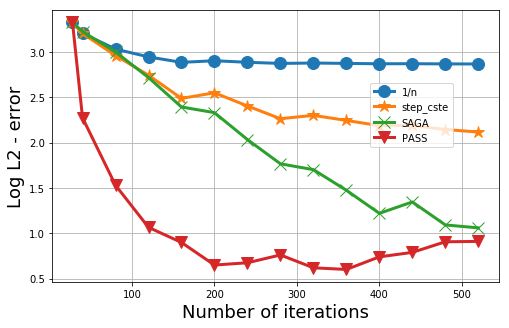

In [22]:
## Plot improvement 
res = Compare_methods_op(Intens_val_bis, gamma = 0.1)
index = res['index']
error1 = res['1/n']
error2 = res['step_cste']
error3 = res['SAGA']
error4 = res['PASS']

### plot values    
option_save = ""; path_Image = ""; ImageName = ""
df = [ [index,error1],
       [index,error2],
       [index,error3],
       [index,error4]]   
labels = ["1/n", "step_cste", "SAGA", "PASS"]
mark = ['o', '*' , 'x', 'v']
bbox_to_anchor_0 = (0.7,.75)
plt.figure(figsize=(8,5))
pltg.Plot_plot(df,labels, xlabel ="Number of iterations", ylabel ="Log L2 - error",
               option=option_save, path =path_Image, ImageName=ImageName, Nset_tick_x = False, mark = mark, bbox_to_anchor_0 = bbox_to_anchor_0)
plt.show()

### Comparison value function after 300 iterations

<center>
<img src="./figures/Opti_placement_value.png" style="width: 600px;"/>
    <i> Optimal control comparison after 300 iterations for different methods: left is the theoretical optimal control, middle is step\_cste and right is PASS. </i>
</center>

# Part 3: Optimal execution of a large order

**Context** An investor wants to buy a given quantity $q_0$.

The price $S_t$ of a tradable instrument satisfies the following dynamic:

$$
dS_t = \alpha \mu dt + \sigma dB_t.
$$

The state of the investor is described by two variables its inventory $Q_t$ and its wealth $W_t$ at time $t$. 

The evolution of these two variables reads 

$$
\left\{
\begin{array}{ll}
dQ_t = \nu dt, & Q_0 = q_0,\\
dW_t = - \nu (S_t + \kappa \nu) dt, & W_0 = 0,
\end{array}
\right.
$$

The investor wants to maximize the following quantity

$$
W_T + Q_T (S_T - A Q_T) - \phi \int_{t}^T Q_s^2 \, ds,
$$

it represents its final wealth $X_T$ at time $T$, plus the value of its inventory penalized by a terminal cost and minus a running quadratic cost.


The value function $V$ is defined such that

$$
V(t,w,q,s) = \sup_{\nu} \mathbb{E}\big[ W_T + Q_T (S_T - A Q_T) - \phi \int_{t}^T Q_s^2 \, ds |W_t = w,\,Q_t = q,\,S_t =s\big].
$$




We remark that $v(t,w,q,s) = V(t,w,q,s) - w -qs $ verifies

$$
v(t,w,q,s) = \sup_{\nu} \mathbb{E} \big[ \underbrace{(W_T - W_t) + (Q_T S_T - Q_t S_t)}_{ = M_T^t} - A Q^2_T - \phi \int_{t}^T Q_s^2 \, ds |W_t = w,\,Q_t = q,\,S_t =s\big].
$$


where the variable $M_T^t$ is independent of the initial values $W_t$, $ S_t$ and $Q_t$. This means that $v$ is a function of only two variables the time $t$ and the inventory $q$. 




The dynamic programming principle ensures that $v$ satisfies 

$$
v(t,q) = \sup_{\nu} \mathbb{E} \big[ M_{t+\Delta}^t - \phi \int_{t}^{t+\Delta} Q_s^2 \, ds + v(t+\Delta,Q_{t+\Delta}) |Q_t = q\big].
$$




We fix a maximum inventory $\bar{q}$. Let $k = (k_T,k_q) \in (\mathbb{N}^*)^2$, $\Delta = T/k_T$, $D_T = \{t_i^{k_T};\,i\leq k_T\}$ and $D_q = \{q_i^{k_q};\,i\leq k_q\}$ with $t_i^{k_T} = i \Delta$ and $q_i^{k_q} = -\bar{q} + 2i \bar{q}/ k_q $. 


To estimate $v$ we use the following scheme $(v_n^k)_{n \geq 1,\,k\in(\mathbb{N}^*)^2}$ defined such that 

$$
v_{n+1}^k(Z_n) = v_{n}^k(Z_n) + \gamma_n(Z_n) \big[ \sup_{\nu \in A(Z_n)} \{ M^\nu_{n+1} - \phi \Delta Q_n^2 + v^k_n(Z^\nu_{n+1})  - v^k_n(Z_n)\} \big],
$$

with $Z_n = (n \Delta, Q_{n\Delta})$ and $ A(Z_n) \in D_q$ is the set of admissible actions. We do not allow controls that leads to states where the inventory exceeds $\bar{q}$. 

## Presentation of the algorithms

We use the same algorithms used in Part 1 to solve this problem.

## Implementation of the methods

 frequency is : 599
 frequency is : 1199
 frequency is : 1799
 frequency is : 2399
 frequency is : 2999
 frequency is : 3599
 frequency is : 4199
 frequency is : 4799
 frequency is : 599
 frequency is : 1199
 frequency is : 1799
 frequency is : 2399
0.05
0.0007943332260213996
0
 frequency is : 2999
0.05
-0.00011084956704984983
1
 frequency is : 3599
0.05
-4.938876784800149e-05
2
 frequency is : 4199
0.05
-1.4080043745190192e-05
3
 frequency is : 4799
0.05
-1.6694673415220237e-05
4
 frequency is : 599
 frequency is : 1199
 frequency is : 1799
 frequency is : 2399
 frequency is : 2999
 frequency is : 3599
 frequency is : 4199
 frequency is : 4799
 frequency is : 599
 frequency is : 1199
 frequency is : 1799
 frequency is : 2399
 frequency is : 2999
 frequency is : 3599
 frequency is : 4199
 frequency is : 4799
 n is :0


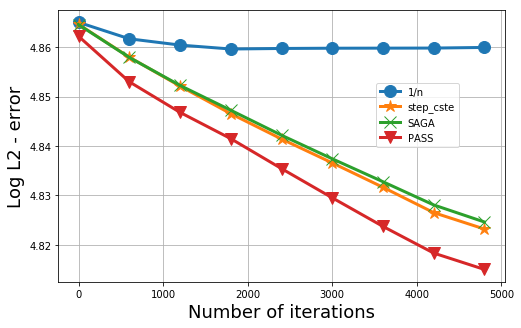

In [26]:
## Plot improvement 
res = Compare_methods_opexec(gamma = 0.05, nb_episode = 5000)
index = res['index']
error1 = res['1/n']
error2 = res['step_cste']
error3 = res['SAGA']
error4 = res['PASS']

### plot values    
option_save = ""; path_Image = ""; ImageName = ""
df = [ [index,error1],
       [index,error2],
       [index,error3],
       [index,error4]]   
labels = ["1/n", "step_cste", "SAGA", "PASS"]
mark = ['o', '*' , 'x', 'v']
bbox_to_anchor_0 = (0.7,.75)
plt.figure(figsize=(8,5))
pltg.Plot_plot(df,labels, xlabel ="Number of iterations", ylabel ="Log L2 - error",
               option=option_save, path =path_Image, ImageName=ImageName, Nset_tick_x = False, mark = mark, bbox_to_anchor_0 = bbox_to_anchor_0)
plt.show()

### Average comparison 

<center>
<img src="./figures/improvement_optimal_exec_f_cmap_reduced112_simu_f.png" style="width: 600px;" />
    <i> The log $L^2$-error against the number of iterations averaged over 115 simulated paths. </i>
</center>

### Comparison value function 

<center>
<img src="./figures/Opti_exec_value_function.png" style="width: 600px;"/>
    <i> Value function comparison for different methods: left is the theoretical optimal control, middle is step\_cste and right is PASS.  </i>
</center>